In [1]:
import xarray as xr
import numpy as np
from xcube.core.geocoded import reproject_dataset, compute_output_geom

In [2]:
path = 'C:\\Users\\Norman\\Downloads\\S3B_OL_1_EFR____20190728T103451_20190728T103751_20190729T141105_0179_028_108_1800_LN1_O_NT_002.SEN3'

In [3]:
vars = dict()
for f in ('qualityFlags.nc', 'geo_coordinates.nc', 'Oa06_radiance.nc', 'Oa13_radiance.nc', 'Oa20_radiance.nc'): 
    ds = xr.open_dataset(path + '\\' + f)
    vars.update(ds.data_vars)
src_ds = xr.Dataset(vars)
src_ds

<xarray.Dataset>
Dimensions:        (columns: 4865, rows: 4091)
Dimensions without coordinates: columns, rows
Data variables:
    quality_flags  (rows, columns) uint32 ...
    altitude       (rows, columns) float32 ...
    latitude       (rows, columns) float64 ...
    longitude      (rows, columns) float64 ...
    Oa06_radiance  (rows, columns) float32 ...
    Oa13_radiance  (rows, columns) float32 ...
    Oa20_radiance  (rows, columns) float32 ...

In [4]:
src_ds['longitude'] = xr.DataArray(src_ds.longitude.values, dims=('rows', 'columns'))
src_ds['latitude'] = xr.DataArray(src_ds.latitude.values, dims=('rows', 'columns'))
src_ds

<xarray.Dataset>
Dimensions:        (columns: 4865, rows: 4091)
Dimensions without coordinates: columns, rows
Data variables:
    quality_flags  (rows, columns) uint32 ...
    altitude       (rows, columns) float32 ...
    latitude       (rows, columns) float64 73.35 73.35 73.35 ... 59.96 59.96
    longitude      (rows, columns) float64 -10.55 -10.54 -10.53 ... 12.07 12.07
    Oa06_radiance  (rows, columns) float32 ...
    Oa13_radiance  (rows, columns) float32 ...
    Oa20_radiance  (rows, columns) float32 ...

In [5]:
compute_output_geom(src_ds, x_name='longitude', y_name='latitude')

ImageGeom(width=20259, height=7386, x_min=-11.918857, y_min=59.959790999999996, res=0.0018134541626457358)

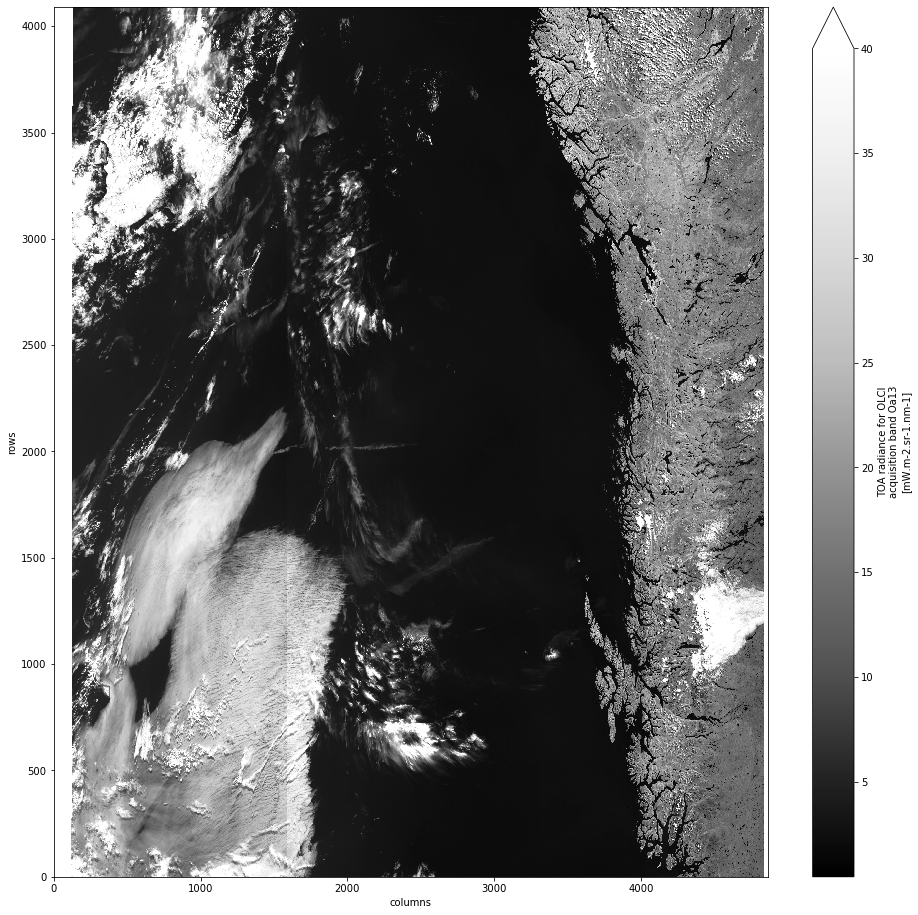

In [14]:
src_ds.Oa13_radiance.plot.imshow(figsize=(16,16), vmax=40, cmap='Greys_r')

In [7]:
col_diff = np.sqrt(np.square(src_ds.longitude.diff('columns')) + np.square(src_ds.latitude.diff('columns'))) 
col_diff

<xarray.DataArray (rows: 4091, columns: 4864)>
array([[0.00843351, 0.00843451, 0.0084335 , ..., 0.00578544, 0.00578423,
        0.00578447],
       [0.00843251, 0.00843251, 0.0084325 , ..., 0.00578544, 0.00578423,
        0.00578447],
       [0.00843051, 0.00843151, 0.0084315 , ..., 0.00578326, 0.00578447,
        0.00578423],
       ...,
       [0.00530347, 0.00530444, 0.00530344, ..., 0.00451173, 0.00451098,
        0.00451173],
       [0.00530344, 0.00530244, 0.00530347, ..., 0.00451076, 0.00451098,
        0.00451173],
       [0.00530244, 0.00530244, 0.00530344, ..., 0.00451076, 0.00451098,
        0.00451076]])
Dimensions without coordinates: rows, columns

In [8]:
row_diff = np.sqrt(np.square(src_ds.longitude.diff('rows')) + np.square(src_ds.latitude.diff('rows'))) 
row_diff

<xarray.DataArray (rows: 4090, columns: 4865)>
array([[0.00256934, 0.00256946, 0.00256969, ..., 0.00487873, 0.00487873,
        0.00487873],
       [0.00256934, 0.00256957, 0.00256969, ..., 0.00487963, 0.00488007,
        0.00487963],
       [0.00256934, 0.00256946, 0.00256969, ..., 0.00487559, 0.00487604,
        0.00487648],
       ...,
       [0.00257784, 0.00257897, 0.00257897, ..., 0.00327525, 0.00327592,
        0.00327592],
       [0.00257883, 0.00257784, 0.00257812, ..., 0.00327592, 0.00327592,
        0.00327592],
       [0.00257883, 0.00257897, 0.00257897, ..., 0.00327525, 0.00327525,
        0.00327592]])
Dimensions without coordinates: rows, columns

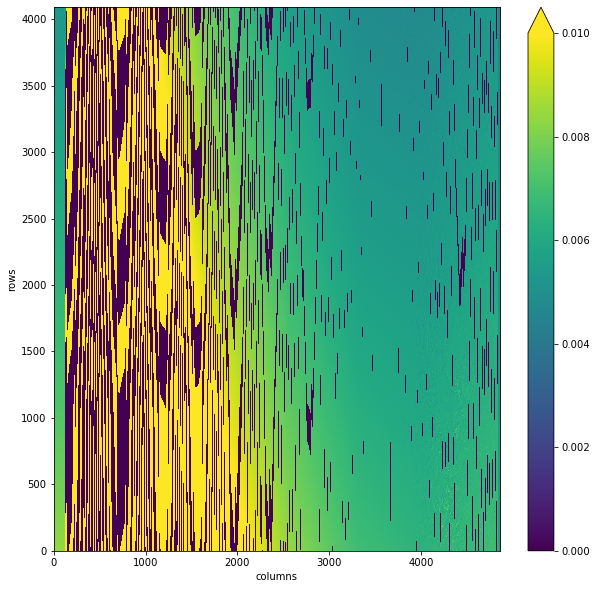

In [9]:
col_diff.plot.imshow(figsize=(10,10), vmin=0.0, vmax=0.01)

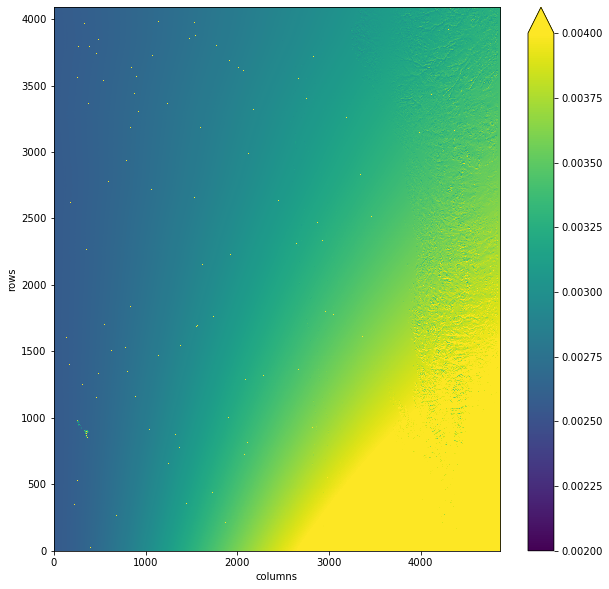

In [10]:
row_diff.plot.imshow(figsize=(10,10), vmin=0.002, vmax=0.004)

In [11]:
dst_ds = reproject_dataset(src_ds, var_names='Oa13_radiance', x_name='longitude', y_name='latitude')

In [12]:
dst_ds

<xarray.Dataset>
Dimensions:        (latitude: 7386, longitude: 20259)
Coordinates:
  * longitude      (longitude) float64 -11.92 -11.92 -11.92 ... 24.82 24.82
  * latitude       (latitude) float64 59.96 59.96 59.96 ... 73.35 73.35 73.35
Data variables:
    Oa13_radiance  (latitude, longitude) float32 nan nan nan nan ... nan nan nan

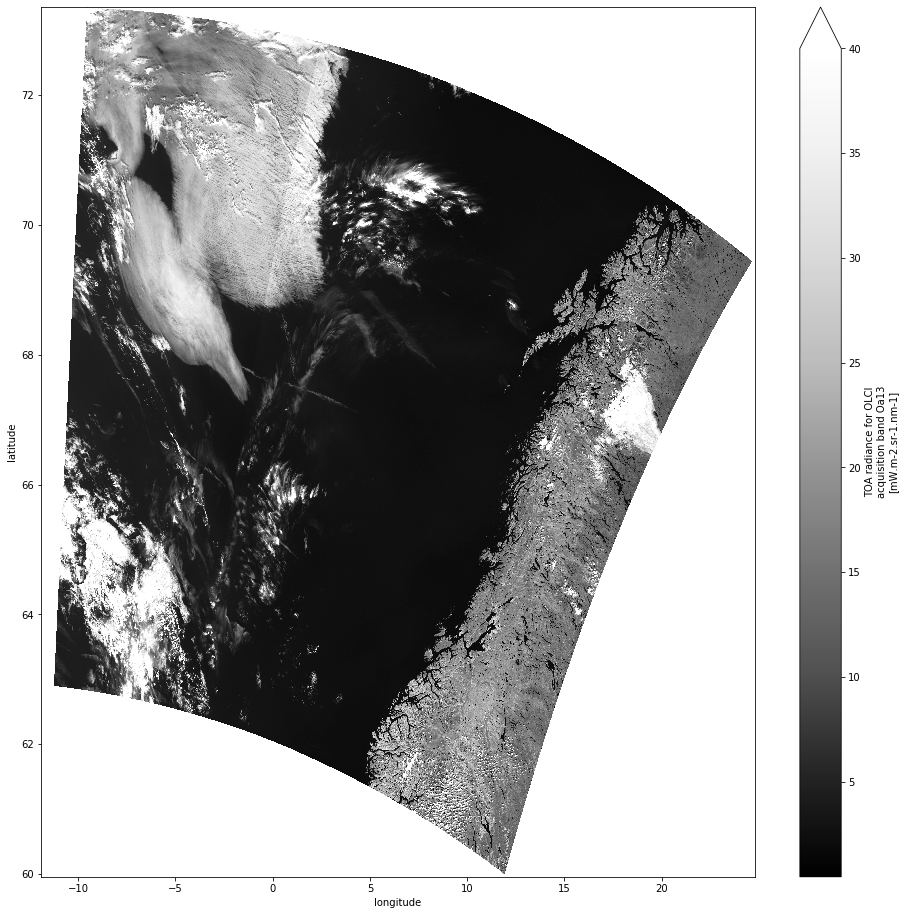

In [40]:
dst_ds.Oa13_radiance.plot.imshow(figsize=(16,16), vmax=40, cmap='Greys_r')

In [18]:
bbox = (5, 62, 7, 64)

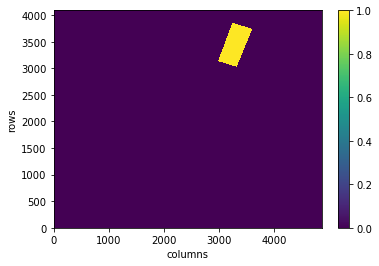

In [20]:
src_bbox = np.logical_and(np.logical_and(src_ds.longitude >= bbox[0], src_ds.longitude <= bbox[2]), 
                          np.logical_and(src_ds.latitude >= bbox[1], src_ds.latitude <= bbox[3]))
src_bbox.plot.imshow()

In [22]:
x = src_ds.columns.where(src_bbox)
y = src_ds.rows.where(src_bbox)

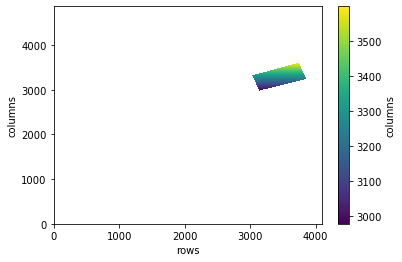

In [23]:
x.plot.imshow()

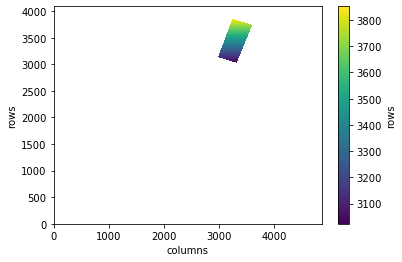

In [24]:
y.plot.imshow()

In [25]:
x1 = int(x.min())
x2 = int(x.max())
y1 = int(y.min())
y2 = int(y.max())

In [26]:
x1, y1, x2, y2

(2977, 3023, 3599, 3852)

In [34]:
rad = src_ds.Oa13_radiance.isel(columns=slice(x1, x2 + 1), rows=slice(y1, y2 + 1))
rad

<xarray.DataArray 'Oa13_radiance' (rows: 830, columns: 623)>
array([[ 2.633536,  2.594229,  2.515616, ...,  4.323716,  2.271916,  2.271916],
       [ 2.712149,  2.617813,  2.641397, ...,  4.575277,  2.381974,  2.326945],
       [ 2.609952,  2.594229,  2.609952, ...,  2.940127,  2.201164,  2.23261 ],
       ...,
       [ 2.342668,  2.437003,  2.287639, ..., 19.228743, 22.750607, 18.018103],
       [ 2.287639,  2.413419,  2.452726, ..., 15.337399, 13.434964, 14.087452],
       [ 2.429142,  2.413419,  2.271916, ...,  8.167892,  8.230783, 13.285599]],
      dtype=float32)
Dimensions without coordinates: rows, columns
Attributes:
    ancillary_variables:  Oa13_radiance_err
    coordinates:          time_stamp altitude latitude longitude
    long_name:            TOA radiance for OLCI acquisition band Oa13
    standard_name:        toa_upwelling_spectral_radiance
    units:                mW.m-2.sr-1.nm-1
    valid_max:            65534
    valid_min:            0

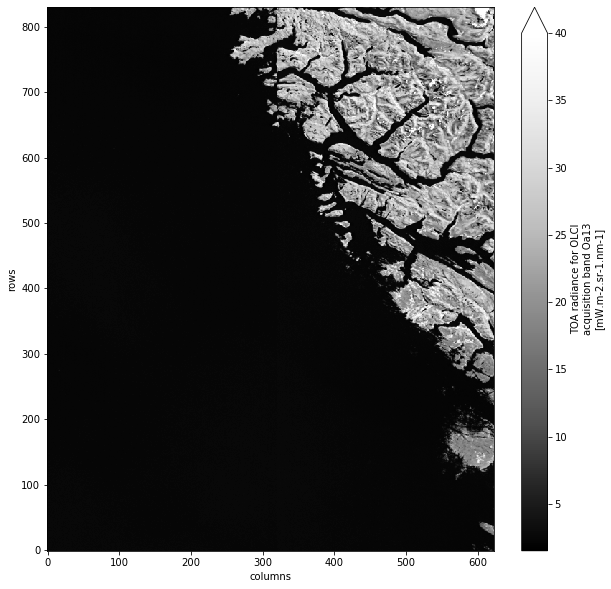

In [35]:
rad.plot.imshow(figsize=(10,10), vmax=40, cmap='Greys_r')

In [38]:
rad = dst_ds.Oa13_radiance.sel(longitude=slice(bbox[0], bbox[2]), latitude=slice(bbox[1], bbox[3]))
rad

<xarray.DataArray 'Oa13_radiance' (latitude: 1102, longitude: 1103)>
array([[28.418604 , 28.418604 , 28.418604 , ..., 23.599627 , 23.599627 ,
        19.110823 ],
       [25.085413 , 25.085413 , 25.085413 , ..., 21.477076 , 21.477076 ,
        21.477076 ],
       [23.426678 , 22.59338  , 22.59338  , ..., 22.648409 , 21.477076 ,
        21.477076 ],
       ...,
       [ 2.531339 ,  2.586368 ,  2.586368 , ...,  2.6413972,  2.6413972,
         2.6413972],
       [ 2.531339 ,  2.531339 ,  2.586368 , ...,  2.5470617,  2.6020908,
         2.6020908],
       [ 2.5392003,  2.5392003,  2.5392003, ...,  2.5392003,  2.609952 ,
         2.609952 ]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 5.001 5.002 5.004 5.006 ... 6.995 6.997 6.999
  * latitude   (latitude) float64 62.0 62.0 62.01 62.01 ... 63.99 64.0 64.0
Attributes:
    ancillary_variables:  Oa13_radiance_err
    coordinates:          time_stamp altitude latitude longitude
    long_name:            TOA radiance for OLCI acquisition band Oa13
    standard_name:        toa_upwelling_spectral_radiance
    units:                mW.m-2.sr-1.nm-1
    valid_max:            65534
    valid_min:            0

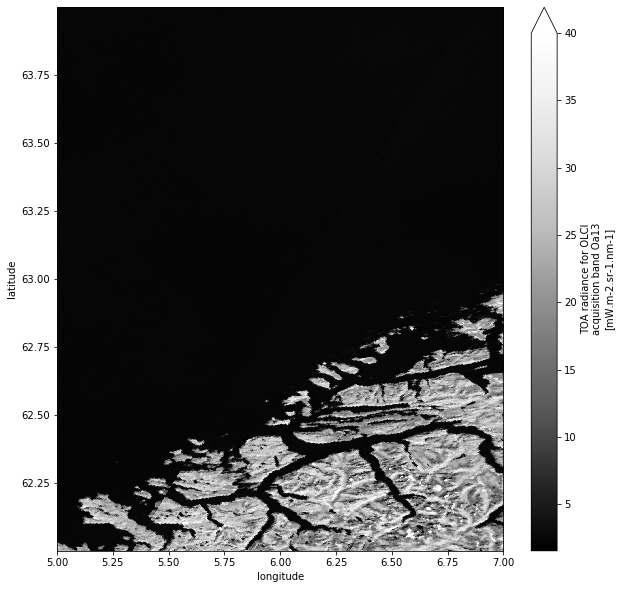

In [39]:
rad.plot.imshow(figsize=(10,10), vmax=40, cmap='Greys_r')